<img src="../images/Callysto_Notebook-Banner_Top_06.06.18.jpg"/>

In [9]:
%%html

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

# Pre-requisites / Background

We are expecting that the students understand Celsius to Kelvin conversions, converting between pressure units, Kinetic Molecular Theory (ideal gas assumptions).

In this section we will cover Boyle’s Law, Gay-Lussac’s Law, and Charles’ Law before putting them together in the Combined Gas Law. 

Alberta Curriculum Objective: illustrate how Boyle's and Charles's laws, individually and combined, are related to the ideal gas law (PV = nRT ).

# Introduction
What do your lungs, guns, and airbags all have in common? They all use the gas laws to function. 

The gas laws resulted from 17th century studies into the physical properties of gases - pressure, volume, and temperature.

# The Gas Laws
## Boyle's Law
Picture this: your lungs expand, so the gas particles inside it are much less compared to the space they occupy, whereas outside your lungs, the gas particles are much more dense. We know that particles move from an area of high density to an area of low density, so air rushes into your lungs, enabling you to breathe.

In technical terms, the space the gas occupies is considered its volume, and the density of particles refers to its pressure. This relationship between the two is called Boyle’s Law, the idea that pressure and volume are inversely proportional at a constant temperature. 

Using the kinetic molecular theory to explain Boyle's Law, while the temperature and the chemical amount of gas are held constant. If the external pressure is increased, the volume available for the gas moelcules is decreased. As a reuslt, the gas molecules become closer together and will collide with each other and with the wall of the container more frequently. As the number of collisions increases, the average force extered by the gas molecules are increased. 

It can be expressed by the equation below: ![P1V1=P2V2](Images/boyles.png).

Example: Assume the temperature and the number of gas molecules stay constant within the adult’s lung. Initially, the capacity of the lung is 3.4 liters, and the pressure in the adult’s lung is 15 mmHg. When the lung is expanded to the maximum capacity, use Boyle’s Law to determine the new pressure in the adult’s lung. 







Example: Assume the temperature and the number of gas molecules stay constant within the balloon. A small gas container has 90 milliliters of nitrogen which in pumped into a balloon. The balloon is sealed tightly, and it is released and raised to a higher altitude where the atmospheric pressure is 50 kPa. Find the final volume of the balloon as it raises up to the mountain. 








Example: Assume the temperature and the number of gas molecules stay constant within the pump. With the pump closed, what change is needed for pressure in order for the volume of the pump to be halved of its original size? 










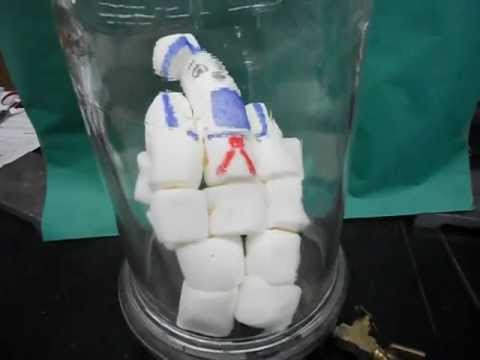

In [1]:
from IPython.lib.display import YouTubeVideo
display(YouTubeVideo('27yqJ9vJ5kQ'))

# Experiment
Let's say we want to find the pressure in an adult male test subject's lungs when they are expanded to maximum capacity. The average lung capacity of an adult human male is 6L. We will test random lung capacities for N trials, and see how Boyle's Law shapes the relationship between pressure and volume.

In [11]:
# Change the variables in this cell to create your own experiment!

# Max volume in liters.
volume = 6

# Number of trials.
N = 100

In [12]:
# Imports.
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np

import math

# Initialize plotly for Jupyter notebooks.
init_notebook_mode(connected=True)

# Initialize data sets.
gx = []
gy = []

# Constant multiple in Boyle's Law.
k = 1

# Boyle's Law is technically PV = k, where k is constant for that specific system, (It varies between systems.)
# and P1V1 = P2V2 is only a result of this relationship. Students do not learn this however.
# For simplicity k is set to 1.

# Standard deviation.
sd = 0.15

# Randomly generate data based on user defined volume and number of trials.
for i in range(0, N):
    temp = np.random.random_sample() * volume
    
    # Prevent large outliers. The limit is arbitrary, it is just so the graph looks nice.
    limit = np.random.random_sample() + 1
    while(k/temp > volume/limit):
        temp = np.random.random_sample() * volume
    
    outputx = np.random.uniform(temp-sd, temp+sd)
    outputy = np.random.uniform((k/temp)-sd, (k/temp)+sd)
    
    gx.append(outputx)
    gy.append(outputy)

# Create a trace.
trace = go.Scatter(
    x = gx,
    y = gy,
    mode = 'markers'
)

# Label the graph.
templayout = go.Layout(
    title = 'Pressure vs. Volume',
    xaxis = dict(title='Volume'),
    yaxis = dict(title='Pressure')
)

# Plot graph
tempdata = [trace]
fig = go.Figure(data = tempdata, layout = templayout)
py.iplot(fig, filename='basic-scatter')

# Charles' Law
In airbags, the temperature is originally extremely high due to the nitrogen gas inflates it. As a result, the volume of the airbag is quickly expanded due to the directly proportional relationship between the temperature and the volume of the gas. When the airbag is later exposed to the outside air, the temperature decreases significantly which causes the volume of the airbag to decrease to a smaller size, creating a softer cushion for the impact.

This relationship between the two variables of volume and temperature is a direct relationship which is defined by the Charle's Law, the idea that the temperature and the volume have an direcly proportional relationship at a constant pressure. 

Using the kinetic molecular theory to explain the Charles' Law, the pressure and the chemical amount of gas are held constant using a piston. When the teperature of the gas molecules increases, the gas molecules will move at a higher speed because temperature and the average kinetic energy of the gas molecules have a direct relationship. As a result, gas molecules will collide with each other and with walls of the container more frequently which exterts a greater force on the wall of container. Because the external pressure on the container are held constant, but the gas pressure inside the container are increased which will push the piston of the container to increase the volume of the container.

It can be expressed by the equation below: ![V1/T1=V2/T2](Images/charles-law.png)


In [13]:
#imports, information to help generate graph
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
import random

In [14]:
#STEP 1
#set these values ONCE at the beginning of your experiment

aveVolume=10 #in litres
standardDeviation=0.4

volumes = []
temperatures = []
trials = []

In [15]:
#STEP 2
#run this cell to generate values to populate your table, then run the table-generating cell
yielded = random.uniform((aveVolume-standardDeviation), (aveVolume+standardDeviation))
volume = round(yielded, 2)
volumes.append(volume)
k = 0.56 #constant for simplicity
temperatures.append(k*volume)

if len(volumes) > len(trials):
    trials.append('Trial ' + str(len(volumes)))

In [16]:
#STEP 3
#graph-generating cell - run after generating each new data pair

init_notebook_mode(connected=True)

#generates volume bars
trace1 = go.Bar(
    x=trials,
    y=volumes,
    name='Volume'
)

#generates temperature bars
trace2 = go.Bar(
    x=trials,
    y=temperatures,
    name='Temperature'
)

#gives graph grouped-bars layout
data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

#generates graph
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

# Gay-Lussac's Law
In bullet guns, you will see a plume of smoke as the gunpowder burns and the bullet whizzes out. The increase in temperature will cause an increase in the pressure which forces the bullet out of the barrel. 

In technical terms, the average kinetic energy of the molecule is referred as the temperature, and the density of the particles is referred as the pressure. The relationship between the two variables is a direct relationship which is defined by the Gay-Lussac's Law, the idea that the temperature and the pressure have an directly proportional relationship at a constant volume.

Using the kinetic molecular theory to explain the Gay-Lussac's law,  the volume and the chemical amount of gas are helf constant. When the temperature of the gas molecules are increased, the gas molecules will move at a higher speed because temperature and the average kinetic energy of the gas molecules have a direct relationship. As a result, gas molecules will collide with each other and with the wall of the container more frequently which exerts a greater force on the wall of container which increases the pressure of the gas. 

It can be expressed by the euqation below: ![P1/T1=P2/T2](Images/Gay-Lussacs-Law.png)



In [17]:
#imports, information to help generate table
import pandas as pd
import matplotlib as mpl
import numpy as np
import random

In [18]:
#STEP 1
#set these values ONCE at the beginning of your experiment

avePressure = 10 #in kPa
standardDeviation = 0.4

trials = [] #leave this blank for now - values will be added later!

In [19]:
#STEP 2
#run this cell to generate values to populate your table, then run the table-generating cell
yielded = random.uniform((avePressure-standardDeviation), (avePressure+standardDeviation))
pressure = round(yielded, 2)
k = 15 #contant for simplicity
trials.append((pressure, 10*pressure))

In [20]:
#STEP 3
#table-generating cell - run after generating each new data pair
labels = ['Pressure', 'Temperature']
trials.sort()
df = pd.DataFrame.from_records(trials, columns=labels)
df.head
df.style
#run step 2 then step 3 repeatedly until satisfied with your table of values

,Pressure,Temperature
0,10.22,102.2
